In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
%%time 
df = pd.read_csv('..\data\IMDB-Dataset.csv',encoding='latin-1')

CPU times: total: 3.78 s
Wall time: 4.38 s


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'mustn', 'would', 'couldn', 'any', 'ma', 'after', 'did', 'ain', 'these', "isn't", 'such', 't', 'on', 'from', 'having', 'where', 'isn', 'most', 'an', 'does', 'below', 'off', 'more', 'hers', 'too', 'who', 'yours', 've', "doesn't", 'up', 'now', 'he', 'and', 'weren', 'through', "haven't", 'y', 'yourself', 'hadn', 'for', "aren't", 'with', 'again', 'each', "mustn't", 'm', 'there', "needn't", 'own', 'your', 'has', 'shall', 'me', 'about', 'than', 'nor', 'are', 'once', 'we', 'both', 'myself', "should've", 'you', 'only', "she's", 'been', 'itself', "don't", 'shouldn', "weren't", 'o', "didn't", 'here', 'few', 'don', 'i', 'into', 'it', 'him', 'down', 'be', 'then', 'over', 'ourselves', "wasn't", 'just', 'his', 'was', 'being', 'might', 'its', 'them', 'before', "shan't", 'a', 'can', "hadn't", 'whom', 'of', 'didn', 'but', 'because', 'could', "you're", "won't", 'needn', "couldn't", 'herself', 'am', 'her', 'won', 'during', 'why', 'themselves', 'at', 'how', 'what', 'had', "shouldn't", 'between', 'wasn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )

In [22]:
# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

In [23]:
#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [24]:
# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)

    return content

In [25]:
#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

Feature Engineering

In [33]:
pd.options.display.max_colwidth = 1000
#Data cleaning
df['reviews_clean']=df['Reviews'].apply(data_cleaning)


#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing 
df=df[df.label<'2']
data=df[['reviews_clean','label']]
print(data['label'].value_counts())

label
0    60000
1    60000
Name: count, dtype: int64


In [51]:
df

,Ratings,Reviews,Movies,Resenhas,Reviews_clean,Label,reviews_clean,label
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...,0,disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money

In [34]:
#Importing dependencies for feature engineering 
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

Lemmatization

In [35]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [62]:
import re
#definig the function for tokenization work
def tokenization(text_data):
    tokens = re.split('\W+',text_data)
    return tokens



Vectoization with Count Vectorizer and TDIDF Vectorizer with Unigram

In [96]:
train,test=train_test_split(data,test_size=.2,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(1,1),min_df=10,max_features=500)
countvect._validate_vocabulary()


In [102]:
train['review_clean_tokenized']= df['reviews_clean'].apply(lambda x: tokenization(x))
train.head(5)

,reviews_clean,label,review_clean_tokenized
53546,watch movie put behind logic ghostly thoughts predictable movie common plot friends fun abandoned pretty place not work way planned watching movie think much done make movie thrilling story not good not much skeleton ghost acting okay tom zembrod knucklebone good cinematography mediocre watchable not anything good not decide longer plot nightmare good twist end may say,0,"[watch, movie, put, behind, logic, ghostly, thoughts, predictable, movie, common, plot, friends, fun, abandoned, pretty, place, not, work, way, planned, watching, movie, think, much, done, make, movie, thrilling, story, not, good, not, much, skeleton, ghost, acting, okay, tom, zembrod, knucklebone, good, cinematography, mediocre, watchable, not, anything, good, not, decide, longer, plot, nightmare, good, twist, end, may, say]"
41730,not know people rating high movie not scary ending boring dont go dont want mad like,0,"[not, know, people, rating, high, movie, not, scary, ending, boring, dont, go, dont, want, mad, like]"
104819,movie fun interesting take horror genre alien invasion mind body control made famous likes thing invasion body snatchers also great commentary dangers mindless consumerism,1,"[movie, fun, interesting, take, horror, genre, alien, invasion, mind, body, control, made, famous, likes, thing, invasion, body, snatchers, also, great, commentary, dangers, mindless, consumerism]"
136459,favorite movies watched long time objectively terrible movie someone reason likable feels almost disjointed like home made school project made group friends thought sequel starts strangely parts barely seem like movie strange project acting strange little internal logic personally love terrible almost seems like actors hamming best movie,1,"[favorite, movies, watched, long, time, objectively, terrible, movie, someone, reason, likable, feels, almost, disjointed, like, home, made, school, project, made, group, friends, thought, sequel, starts, strangely, parts, barely, seem, like, movie, strange, project, acting, strange, little, internal, logic, personally, love, terrible, almost, seems, like, actors, hamming, best, movie]"
93062,movie sitting around months waiting watch finally say pleased definitely reminiscent rivals silent hill however lot people seem stupid reasons not liking movie honestly cgi costumes not bad think big trouble little china better acting classic movie horror poltergeist gore not focus movie used effectively story understandably bit confusing good pacing impact not ashamed say like b movies lot still let recent hollywood horror films take one lame saw sequels day,1,"[movie, sitting, around, months, waiting, watch, finally, say, pleased, definitely, reminiscent, rivals, silent, hill, however, lot, people, seem, stupid, reasons, not, liking, movie, honestly, cgi, costumes, not, bad, think, big, trouble, little, china, better, acting, classic, movie, horror, poltergeist, gore, not, focus, movie, used, effectively, story, understandably, bit, confusing, good, pacing, impact, not, ashamed, say, like, b, movies, lot, still, let, recent, hollywood, horror, films, take, one, lame, saw, sequels, day]"


In [109]:
test['review_clean_tokenized']= df['reviews_clean'].apply(lambda x: tokenization(x))
test.head(5)

,reviews_clean,label,review_clean_tokenized
101787,kate needs stop denying perfectionist controller needs watch show see acts became vain since become conscious paparazzi live spotlight expect money really root evil see happens ask much remember balance not seen treat jon go something remove sit worried look like tv camera forgot fun kids suppose fun get dirty give old clothes play clothes not worry getting dirty,1,"[kate, needs, stop, denying, perfectionist, controller, needs, watch, show, see, acts, became, vain, since, become, conscious, paparazzi, live, spotlight, expect, money, really, root, evil, see, happens, ask, much, remember, balance, not, seen, treat, jon, go, something, remove, sit, worried, look, like, tv, camera, forgot, fun, kids, suppose, fun, get, dirty, give, old, clothes, play, clothes, not, worry, getting, dirty]"
97218,main talking point surrounding imaginarium doctor parnassus fact last appearance late heath ledger however lot talk film ledger performance good one expect done better iconic roles problem faced death occurring filming completed overcome easily one not necessarily know ledger died evidence film fitting tribute film johnny depp version heath ledger character comments celebrities died young live forever however film deserves discussed piece work like many terry gilliam films complex imaginative titular doctor parnassus christopher plummer operates mostly unsuccessful travelling show hopes send members public magic mirror imaginarium ultimately face choice giving soul parnassus devil tom waits two contest soul valentina lily cole doctor daughter helping doctor show lovelorn anton dwarf percy tony mysterious stranger draw punters initially plot points work well doctor parnassus desperate man almost given hope whilst devil entertaining watch yet evidently devious heart film lies valenti...,1,"[main, talking, point, surrounding, imaginarium, doctor, parnassus, fact, last, appearance, late, heath, ledger, however, lot, talk, film, ledger, performance, good, one, expect, done, better, iconic, roles, problem, faced, death, occurring, filming, completed, overcome, easily, one, not, necessarily, know, ledger, died, evidence, film, fitting, tribute, film, johnny, depp, version, heath, ledger, character, comments, celebrities, died, young, live, forever, however, film, deserves, discussed, piece, work, like, many, terry, gilliam, films, complex, imaginative, titular, doctor, parnassus, christopher, plummer, operates, mostly, unsuccessful, travelling, show, hopes, send, members, public, magic, mirror, imaginarium, ultimately, face, choice, giving, soul, parnassus, devil, tom, waits, two, contest, soul, valentina, ...]"
54071,big lovecraft fan trouble movies based works even remotely loyal right not either fact movie absolutely nothing cthulhu gang take wrong people hostage hell breaks lose nothing original nothing offensive clichã either sadly movie falls apart end shame decent finale not bad astounded low imdb rating confidently say not deserve not great not terrible either want decent movie based lovecrafts works well kind luck not sure seen one necronomican not awful suppose make cthulhu movie know cthulhu make big scary resist urge use tentacles inappropriately watched bit much japanese anime lately ever make cthulhu movie involve school girls definite r rating,0,"[big, lovecraft, fan, trouble, movies, based, works, even, remotely, loyal, right, not, either, fact, movie, absolutely, nothing, cthulhu, gang, take, wrong, people, hostage, hell, breaks, lose, nothing, original, nothing, offensive, clichã, either, sadly, movie, falls, apart, end, shame, decent, finale, not, bad, astounded, low, imdb, rating, confidently, say, not, deserve, not, great, not, terrible, either, want, decent, movie, based, lovecrafts, works, well, kind, luck, not, sure, seen, one, necronomican, not, awful, suppose, make, cthulhu, movie, know, cthulhu, make, big, scary, resist, urge, use, tentacles, inappropriately, watched, bi

In [2]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer_object  = nltk.WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer_object.lemmatize(word) for word in text]
  return lemm_text

     

In [103]:
train['reviews_lemmatized'] = train['review_clean_tokenized'].apply(lambda x: lemmatizer(x))

In [104]:
train['reviews_lemmatized'] = train['reviews_lemmatized'].agg(lambda x: ' '.join(map(str,x)))

In [110]:
test['reviews_lemmatized'] = test['review_clean_tokenized'].apply(lambda x: lemmatizer(x))


In [112]:
test['reviews_lemmatized'] = test['reviews_lemmatized'].agg(lambda x: ' '.join(map(str,x)))

In [113]:
train.head(5)

,label,reviews_lemmatized
53546,0,watch movie put behind logic ghostly thought predictable movie common plot friend fun abandoned pretty place not work way planned watching movie think much done make movie thrilling story not good not much skeleton ghost acting okay tom zembrod knucklebone good cinematography mediocre watchable not anything good not decide longer plot nightmare good twist end may say
41730,0,not know people rating high movie not scary ending boring dont go dont want mad like
104819,1,movie fun interesting take horror genre alien invasion mind body control made famous like thing invasion body snatcher also great commentary danger mindless consumerism
136459,1,favorite movie watched long time objectively terrible movie someone reason likable feel almost disjointed like home made school project made group friend thought sequel start strangely part barely seem like movie strange project acting strange little internal logic personally love terrible almost seems like actor hamming best movie
93062,1,movie sitting around month waiting watch finally say pleased definitely reminiscent rival silent hill however lot people seem stupid reason not liking movie honestly cgi costume not bad think big trouble little china better acting classic movie horror poltergeist gore not focus movie used effectively story understandably bit confusing good pacing impact not ashamed say like b movie lot still let recent hollywood horror film take one lame saw sequel day


In [114]:
test.head(5)

,reviews_clean,label,review_clean_tokenized,reviews_lemmatized
101787,kate needs stop denying perfectionist controller needs watch show see acts became vain since become conscious paparazzi live spotlight expect money really root evil see happens ask much remember balance not seen treat jon go something remove sit worried look like tv camera forgot fun kids suppose fun get dirty give old clothes play clothes not worry getting dirty,1,"[kate, needs, stop, denying, perfectionist, controller, needs, watch, show, see, acts, became, vain, since, become, conscious, paparazzi, live, spotlight, expect, money, really, root, evil, see, happens, ask, much, remember, balance, not, seen, treat, jon, go, something, remove, sit, worried, look, like, tv, camera, forgot, fun, kids, suppose, fun, get, dirty, give, old, clothes, play, clothes, not, worry, getting, dirty]",kate need stop denying perfectionist controller need watch show see act became vain since become conscious paparazzo live spotlight expect money really root evil see happens ask much remember balance not seen treat jon go something remove sit worried look like tv camera forgot fun kid suppose fun get dirty give old clothes play clothes not worry getting dirty
97218,main talking point surrounding imaginarium doctor parnassus fact last appearance late heath ledger however lot talk film ledger performance good one expect done better iconic roles problem faced death occurring filming completed overcome easily one not necessarily know ledger died evidence film fitting tribute film johnny depp version heath ledger character comments celebrities died young live forever however film deserves discussed piece work like many terry gilliam films complex imaginative titular doctor parnassus christopher plummer operates mostly unsuccessful travelling show hopes send members public magic mirror imaginarium ultimately face choice giving soul parnassus devil tom waits two contest soul valentina lily cole doctor daughter helping doctor show lovelorn anton dwarf percy tony mysterious stranger draw punters initially plot points work well doctor parnassus desperate man almost given hope whilst devil entertaining watch yet evidently devious heart film lies valenti...,1,"[main, talking, point, surrounding, imaginarium, doctor, parnassus, fact, last, appearance, late, heath, ledger, however, lot, talk, film, ledger, performance, good, one, expect, done, better, iconic, roles, problem, faced, death, occurring, filming, completed, overcome, easily, one, not, necessarily, know, ledger, died, evidence, film, fitting, tribute, film, johnny, depp, version, heath, ledger, character, comments, celebrities, died, young, live, forever, however, film, deserves, discussed, piece, work, like, many, terry, gilliam, films, complex, imaginative, titular, doctor, parnassus, christopher, plummer, operates, mostly, unsuccessful, travelling, show, hopes, send, members, public, magic, mirror, imaginarium, ultimately, face, choice, giving, soul, parnassus, devil, tom, waits, two, contest, soul, valentina, ...]",main talking point surrounding imaginarium doctor parnassus fact last appearance late heath ledger however lot talk film ledger performance good one expect done better iconic role problem faced death occurring filming completed overcome easily one not necessarily know ledger died evidence film fitting tribute film johnny depp version heath ledger character comment celebrity died young live forever however film deserves discussed piece work like many terry gilliam film complex imaginative titular doctor parnassus christopher plummer operates mostly unsuccessful travelling show hope send member public magic mirror imaginarium ultimately face choice giving soul parnassus devil tom wait two contest soul valentina lily cole doctor daughter helping doctor show lovelorn anton dwarf percy tony mysterious stranger draw punter initially plot point work well doctor parnassus desperate man almost given hope whilst devil enterta

In [106]:
train = train.drop(['reviews_clean', 'review_clean_tokenized'  ], axis=1)

In [115]:
test = test.drop(['reviews_clean', 'review_clean_tokenized'  ], axis=1)

In [117]:

x_train_count = countvect.fit_transform(train['reviews_lemmatized']).toarray()


In [116]:
x_test_count = countvect.transform(test['reviews_lemmatized']).toarray()

In [118]:
x_train_tfidf = tfidfvect.fit_transform(train['reviews_lemmatized']).toarray()

In [120]:
x_test_tfidf = tfidfvect.transform(test['reviews_lemmatized']).toarray()

In [122]:
y_train = train['label']
y_test = test['label']

Feature Importance with Logistic Regression and Count Vectorizer with unigram

In [124]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.12135488354285259   |
|   absolutely   |  0.03085509717932042   |
|      act       |  -0.16557185382612682  |
|     acting     |  -0.1658066886665021   |
|     action     |   0.2674340213194047   |
|     actor      |  -0.13188873250893543  |
|    actress     |  -0.1363631490431481   |
|    actually    | -0.051757450418905865  |
|      add       |  0.04510622712614697   |
|     adult      |  0.07337357450788864   |
|      age       |  0.09287918433947069   |
|     alien      |  -0.07050555461518924  |
|     almost     |  -0.02128799988620413  |
|     along      |  0.11078502116874386   |
|    already     |  -0.2115109753425091   |
|      also      |   0.1113311067037724   |
|    although    |  0.20833369276741218   |
|     always     |  0.17761154096694443   |
|    amazing     |   0.8265175875859685   |
|    american    |  0.0588781914

Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram

In [125]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |   0.5572612873811554  |
|   absolutely   |  0.38681323746259244  |
|      act       |  -1.1037866597594925  |
|     acting     |  -1.6012439414681097  |
|     action     |   2.6756821710258385  |
|     actor      |  -1.3960642636724938  |
|    actress     |  -0.8722802709311795  |
|    actually    |  -0.41199459577643566 |
|      add       |  0.14514146827117813  |
|     adult      |   0.8180638565184115  |
|      age       |   0.7684532919710179  |
|     alien      |  -0.33872398930953956 |
|     almost     |  -0.3056164567854971  |
|     along      |   0.6613602703690604  |
|    already     |  -1.1710613334214308  |
|      also      |   1.3189340310560722  |
|    although    |   1.2335504961358406  |
|     always     |   1.6123464037542043  |
|    amazing     |   4.768158907558686   |
|    american    |  0.48020257745913114  |
|    annoyi

Vectorization with Count Vectorizer and TDIDF Vectorizer with Bigram

In [126]:
countvect = CountVectorizer(analyzer = "word", ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(2,2),min_df=10,max_features=500)

In [127]:
x_train_count = countvect.fit_transform(train['reviews_lemmatized']).toarray()
x_test_count = countvect.transform(test['reviews_lemmatized']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['reviews_lemmatized']).toarray()
x_test_tfidf = tfidfvect.transform(test['reviews_lemmatized']).toarray()
y_train = train['label']
y_test = test['label']

Feature Importance with Logistic Regression and Count Vectorizer with Bigram

In [128]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|       acting bad      |   -1.401942440151262  |
|      acting good      |   0.6952947504452436  |
|       acting not      |  -0.4325250257432896  |
|      action film      |  0.35273812499176227  |
|      action movie     |  0.26013284817621274  |
|     action packed     |   1.393643251994895   |
|      action scene     |  0.16338458545859313  |
|    action sequence    |   0.1402389743209386  |
|     actor actress     |  -0.17068178794707992 |
|       actor not       |  -0.4121496392824858  |
|      almost every     |  -0.1068625178585918  |
|       along way       |   0.4481131178100299  |
|        also not       |  -0.1497602304310507  |
|      although not     |   0.4884613465666785  |
|     another movie     |  -0.24861498427314385 |
|     anything else     |  -0.32724971816668597 |
|       bad acting      |    -1.0312905676656   |


Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram

In [129]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|       acting bad      |   -3.088193419796824  |
|      acting good      |   1.5162069745419506  |
|       acting not      |  -1.2421710191702793  |
|      action film      |   1.1964403032499158  |
|      action movie     |   0.7852465880331568  |
|     action packed     |   3.220171780880351   |
|      action scene     |   0.4719943890994501  |
|    action sequence    |  0.36329985931415687  |
|     actor actress     |  -0.3925446144082011  |
|       actor not       |  -0.9838828520783978  |
|      almost every     |  -0.21129509624774728 |
|       along way       |   1.050110113395169   |
|        also not       |  -0.3659211895787021  |
|      although not     |   1.1194008390127625  |
|     another movie     |  -0.6415041344284603  |
|     anything else     |  -0.7914663910520366  |
|       bad acting      |  -2.6677114449057213  |


In [131]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(10)

,Reviews,Ratings,Movies
120047,"While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.",9.0,Ring of Terror
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9.0,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9.0,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9.0,#Horror
120273,"What do you get when you cross Love Story with Star Wars with Blade Runner with Back to the Future with MTV? Love Story 2050, that's what. What a fun movie for the entire family. This fantasy of epic proportions is much, much better than AI, a similar sci-fi classic. The thrills are non-stop in this blockbuster, from its lead off car chase to bike racing stunts to the vantage point of a moving roller coaster to speeding hover-craft--you will be on the edge of your seat from beginning to end. The version I saw was only partially in English and I still was glued to the screen. I can't wait to see a version with subtitles. The mega budget special effects are out of this world and highly convincing. The future vision of XBox was hilarious. Those who are complaining about how long this movie is simply don't understand Bollywood. The three hours went by quickly; it seemed to be only an hour. There could have been a better twist with the Darth Vader character. 

Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram

In [133]:
countvect = CountVectorizer(analyzer = "word", ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(3,3),min_df=10,max_features=500)

In [134]:
x_train_count = countvect.fit_transform(train['reviews_lemmatized']).toarray()
x_test_count = countvect.transform(test['reviews_lemmatized']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['reviews_lemmatized']).toarray()
x_test_tfidf = tfidfvect.transform(test['reviews_lemmatized']).toarray()
y_train = train['label']
y_test = test['label']

Feature Importance with Logistic Regression and Count Vectorizer with Trigram

In [135]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  -0.4424568904544968  |
|      acting not good      |  -1.1648454748786943  |
|      acting not great     |  -0.4671534005227637  |
|     acting pretty good    |    0.86186536885324   |
|      acting top notch     |   1.778258398127052   |
|      action movie not     |   1.0123145894597152  |
|      action set piece     |   1.1283254131058627  |
|     action take place     |  0.05955596891791834  |
|       actor good job      |   0.5928201995326384  |
|    actually pretty good   |  0.28964855479699947  |
|    actually quite good    |  -0.1642124412905427  |
|     almost every scene    |  -0.2077812831334781  |
|       bad acting bad      |   -2.293925248926595  |
|        bad bad bad        |  -1.7646651397074413  |
|        bad guy not        |   0.1327532447785158  |
|      bad horror movie     

Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

In [136]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  -0.6315623564637137  |
|      acting not good      |  -1.3917412220776146  |
|      acting not great     |  -0.6302190316834598  |
|     acting pretty good    |   0.9765274245784308  |
|      acting top notch     |   2.032980054374924   |
|      action movie not     |   1.2577218518998703  |
|      action set piece     |   1.2240672381340494  |
|     action take place     |  0.09334416654303783  |
|       actor good job      |   0.6857814408524058  |
|    actually pretty good   |   0.3128366803806892  |
|    actually quite good    |  -0.14349934188445904 |
|     almost every scene    |  -0.2858373155092896  |
|       bad acting bad      |   -2.802596614595062  |
|        bad bad bad        |   -2.569455867837226  |
|        bad guy not        |   0.274985433499419   |
|      bad horror movie     

Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram

In [139]:
countvect = CountVectorizer(analyzer = "word", ngram_range=(1,3), min_df=10,max_features=2000)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3),min_df=10,max_features=2000)

In [140]:
x_train_count = countvect.fit_transform(train['reviews_lemmatized']).toarray()
x_test_count = countvect.transform(test['reviews_lemmatized']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['reviews_lemmatized']).toarray()
x_test_tfidf = tfidfvect.transform(test['reviews_lemmatized']).toarray()
y_train = train['label']
y_test = test['label']

In [141]:
from sklearn.feature_selection import chi2

In [144]:
import numpy as np
N = 2000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

1. 0 :
	# Unigrams :
	. slasher
	. difficult
	. steven
	. ground
	. large
	. presence
	. post
	. forever
	. voice
	. road
	. wise
	. surely
	. eventually
	. reach
	. dr
	. energy
	. round
	. quick
	. formula
	. accident
	. ago
	. starting
	. comparison
	. rate
	. jaw
	. ups
	. candy
	. halloween
	. person
	. likely
	. introduced
	. huge
	. ex
	. second
	. fairly
	. took
	. wow
	. machine
	. outside
	. needed
	. besides
	. include
	. noticed
	. building
	. opposite
	. one
	. pick
	. consider
	. agent
	. air
	. appearance
	. class
	. excitement
	. behind
	. ring
	. scary
	. came
	. usually
	. double
	. dvd
	. lady
	. notice
	. worked
	. immediately
	. alone
	. process
	. numerous
	. roger
	. club
	. queen
	. gotten
	. fashion
	. speed
	. released
	. turn
	. public
	. popular
	. sheer
	. weapon
	. scenery
	. number
	. sent
	. girlfriend
	. knew
	. photography
	. hunter
	. television
	. stage
	. damn
	. development
	. leaving
	. pilot
	. dancing
	. finding
	. professional
	. teenage
	. cli

Model Selection

In [4]:
# Import prerequisite libraries
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

Logistic Regression Model

In [147]:
model_1=LogisticRegression()

In [149]:
#Training of Logistic Regression Model
model_1.fit(x_train_tfidf,y_train)

LogisticRegression()

Evaluation on Test and Train dataset

In [150]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.89059375
AUC Score on training dateset for Logistic Regression: 0.9573824916276235
F1 Score ftraining dateset for Logistic Regression: 0.8905914255323572
Precision Score on test for Logistic Regression: 0.882125
AUC Score on test for Logistic Regression: 0.9510075045429932
F1 Score for Logistic Regression: 0.8821295941318602


Decision Tree Classifier

In [152]:
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

In [153]:
#raining of Decision Tree Classifier
model_2.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

Evaluation on test data and training data of Decision Tree Classifier

In [154]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.9999479166666667
AUC Score on training dateset for Decision Tree Classifier: 0.9999999837236728
F1 Score training dateset for Decision Tree Classifier: 0.999947916677885
Precision Score on test for Decision Tree Classifier: 0.7165
AUC Score on test for Decision Tree Classifier: 0.7166816364916382
F1 Score for Decision Tree Classifier: 0.716504115719288


Decision Tree Classifier with max depth 11 to fix overfit

In [155]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [156]:
model_3.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [157]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.7467083333333333
AUC Score on training dateset for Decision Tree Classifier: 0.8177681691197051
F1 Score training dateset for Decision Tree Classifier: 0.7433448398402146
Precision Score on test for Decision Tree Classifier: 0.7165416666666666
AUC Score on test for Decision Tree Classifier: 0.773820177840312
F1 Score for Decision Tree Classifier: 0.7133716453965113


Random Forest Classifier

In [158]:
model_4 = Pipeline(
    steps=[
        ("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ]
)

In [159]:
model_4.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, min_samples_split=3))])

In [160]:
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.8496770833333334
AUC Score on training dateset for Random Forest Classifier: 0.9347618740514207
F1 Score training dateset for Random Forest Classifier: 0.8493115422795396
Precision Score on test for Random Forest Classifier: 0.8085
AUC Score on test for Random Forest Classifier: 0.898197976364188
F1 Score for Random Forest Classifier: 0.8082060985460421


Ada Boost Classifier

In [161]:
model_5 = Pipeline(
    steps=[
        ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=100,
    learning_rate=.8)),
    ]
)

In [162]:
model_5.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                    learning_rate=0.8, n_estimators=100))])

In [163]:
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)

Precision Score on training dateset for Ada Boost Classifier: 0.8942395833333333
AUC Score on training dateset for Ada Boost Classifier: 0.9656488347129216
F1 Score training dateset for Ada Boost Classifier: 0.8942383898241694
Precision Score on test for Ada Boost Classifier: 0.8526666666666667
AUC Score on test for Ada Boost Classifier: 0.9224465608576751
F1 Score for Random Forest Classifier: 0.8526735004497562


Hyperparameter Tunning with Grid Search

In [164]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

In [165]:
def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,            
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters


Hyperparameter tunning of Logistic Regression

In [167]:
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 1/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.852 total time=  11.3s
[CV 2/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 2/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.855 total time=  11.6s
[CV 3/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 3/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.857 total time=   5.4s
[CV 4/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 4/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.853 total time=   5.5s
[CV 5/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 5/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.853 total time=   4.2s
[CV 1/5; 2/48] START C=0.01, max_iter=100, penal

In [168]:
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.89059375
AUC Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9573824916276235
F1 Score training dateset for Finetuned Logsitic Regression Classifier: 0.8905914255323572
Precision Score on test for Finetuned Logsitic Regression Classifier: 0.882125
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.9510075045429932
F1 Score for Finetuned Logsitic Regression Classifier: 0.8821295941318602


Model Evaluation

In [169]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

Logistic Regression Model

In [191]:
'''model_1 = Pipeline(
    steps=[
        #best base model("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)),
    ("classifier", LogisticRegression())]
)'''
model_1=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)
model_2=Pipeline(
    steps=[
        ("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None))
    ]
)

In [197]:
model_1.fit(x_train_tfidf,y_train)

LogisticRegression(C=10, max_iter=200)

In [199]:
model_2.fit(x_train_count,y_train)

Pipeline(steps=[('classifier', LogisticRegression())])

In [200]:
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))
print("Precision Score for Logistic Regression Pipeline: %s" % precision_score(y_test,model_2.predict(x_test_count),average='micro'))
print("Recall Score for Logistic Regression Pipeline: %s" % recall_score(y_test,model_2.predict(x_test_count),average='micro'))
print("AUC Score for Logistic Regression Pipeline: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_count)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_count),average="weighted")
print("F1 Score for Logistic Regression Pipeline: %s" % f1_score_2)
print("Accuracy Score for Logistic Regression Pipeline: %s" % accuracy_score(y_test,model_2.predict(x_test_count)))

Precision Score for Logistic Regression: 0.8810416666666666
Recall Score for Logistic Regression: 0.8810416666666666
AUC Score for Logistic Regression: 0.9509627836626581
F1 Score for Logistic Regression: 0.8810437582417583
Accuracy Score for Logistic Regression: 0.8810416666666666
Precision Score for Logistic Regression Pipeline: 0.8804583333333333
Recall Score for Logistic Regression Pipeline: 0.8804583333333333
AUC Score for Logistic Regression Pipeline: 0.9467993794564543
F1 Score for Logistic Regression Pipeline: 0.8804570347935299
Accuracy Score for Logistic Regression Pipeline: 0.8804583333333333


In [201]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

Confusion metrics

In [202]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

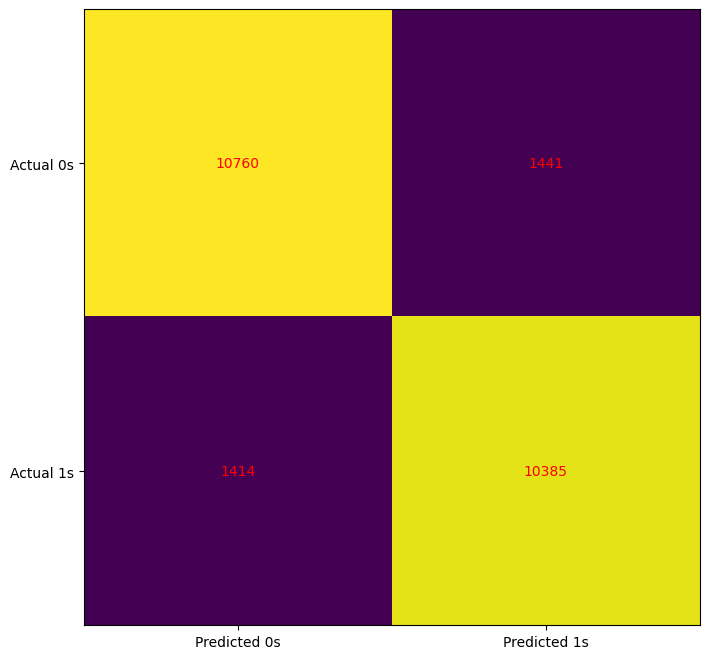

In [203]:
confusion_matrix_plot(y_test,y_predict)